In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist,mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [10]:

#     0: T-shirt/top
#     1: Trouser
#     2: Pullover
#     3: Dress
#     4: Coat
#     5: Sandal
#     6: Shirt
#     7: Sneaker
#     8: Bag
#     9: Ankle boot


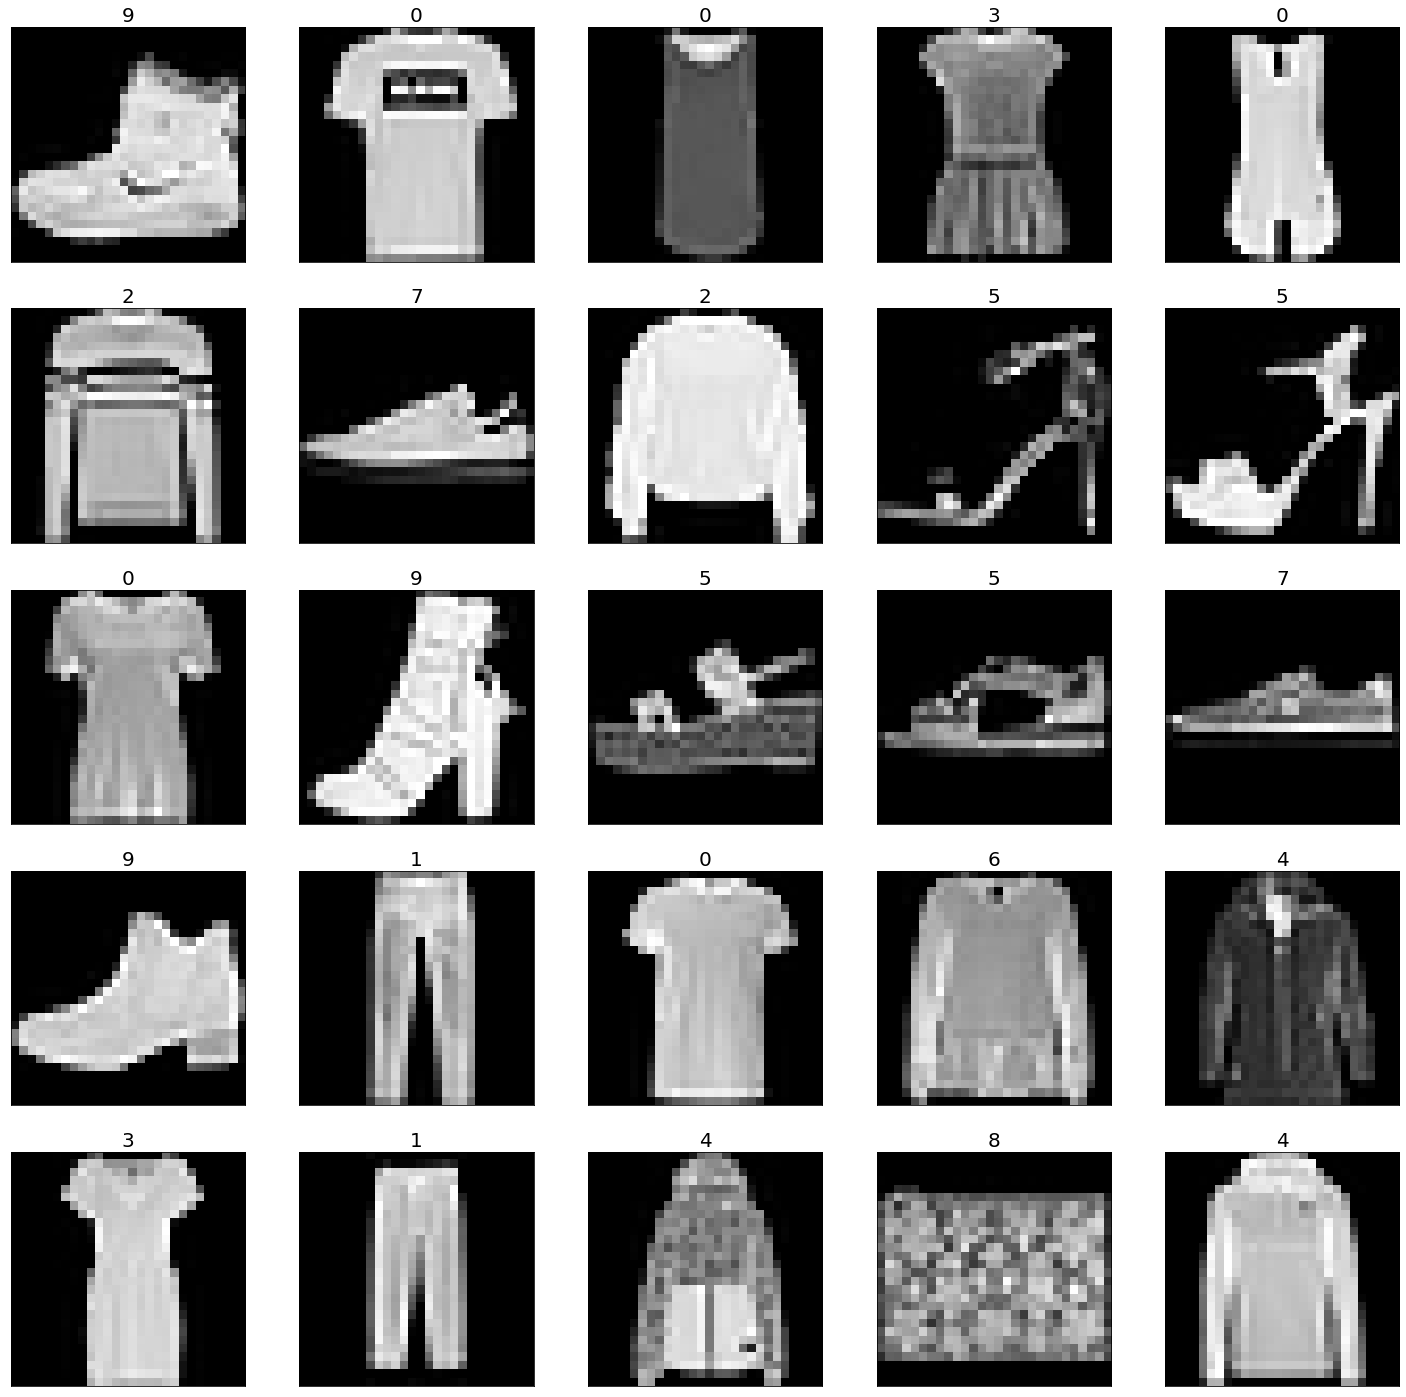

In [9]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i],fontsize=20)
plt.show()

#### Data proprocessing

In [11]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [12]:
#### Normalization
x_train = x_train/255
x_test = x_test/255

#### Reshaping

x_train = x_train.reshape(5000,28,28,1)
x_test = x_test.reshape(1000,28,28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


In [13]:
print(y_train[:5])

[9 0 0 3 0]


#### Import the libraries

In [15]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential

#### Build the CNN architecture

In [21]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # stride=1
m1.add(MaxPooling2D(pool_size=(2,2)))  # stride=2

m1.add(Conv2D(32,(3,3),activation='relu')) # stride=1
m1.add(MaxPooling2D(pool_size=(2,2)))  # stride=2

m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [22]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
157/157 [==============================] - 9s 51ms/step - loss: 1.0367 - acc: 0.6178 - val_loss: 0.7104 - val_acc: 0.7230
Epoch 2/20
157/157 [==============================] - 9s 54ms/step - loss: 0.5753 - acc: 0.7854 - val_loss: 0.6055 - val_acc: 0.7750
Epoch 3/20
157/157 [==============================] - 8s 51ms/step - loss: 0.5096 - acc: 0.8084 - val_loss: 0.5383 - val_acc: 0.8010
Epoch 4/20
157/157 [==============================] - 8s 53ms/step - loss: 0.4494 - acc: 0.8378 - val_loss: 0.5471 - val_acc: 0.8250
Epoch 5/20
157/157 [==============================] - 9s 59ms/step - loss: 0.4068 - acc: 0.8542 - val_loss: 0.4791 - val_acc: 0.8280
Epoch 6/20
157/157 [==============================] - 8s 49ms/step - loss: 0.3750 - acc: 0.8642 - val_loss: 0.4827 - val_acc: 0.8300
Epoch 7/20
157/157 [==============================] - 7s 45ms/step - loss: 0.3685 - acc: 0.8640 - val_loss: 0.4640 - val_acc: 0.8490
Epoch 8/20
157/157 [==============================] - 7s 45ms/step - 

In [23]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
15,0.194949,0.9318,0.474879,0.858,15
16,0.190896,0.9304,0.499717,0.843,16
17,0.179360,0.9352,0.440524,0.859,17
18,0.161655,0.9444,0.460175,0.866,18
19,0.153697,0.9462,0.449150,0.865,19


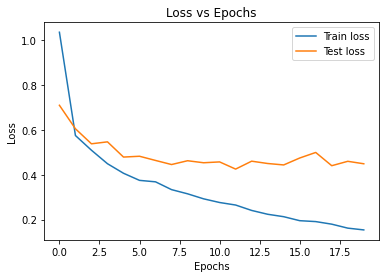

In [25]:
plt.plot(r1['Epochs'],r1['loss'],label='Train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

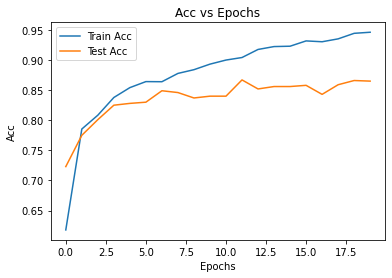

In [26]:
plt.plot(r1['Epochs'],r1['acc'],label='Train Acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test Acc')
plt.title('Acc vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [27]:
ypred_m1 = m1.predict(x_test)
ypred_m1[:10]

array([[1.8595478e-07, 1.6370669e-09, 4.1540758e-07, 2.0750601e-08,
        1.7297850e-07, 6.0129329e-05, 3.4240550e-08, 7.3027884e-04,
        1.1074742e-05, 9.9919766e-01],
       [6.0474795e-05, 1.3101477e-12, 9.9815601e-01, 1.6483934e-06,
        6.8589661e-04, 3.2905356e-11, 1.0959487e-03, 4.1573113e-18,
        5.2446814e-10, 1.1221580e-12],
       [2.0481600e-07, 9.9999976e-01, 9.5950392e-10, 2.6266584e-09,
        5.7177916e-09, 4.3745879e-12, 1.1839045e-10, 1.4179333e-16,
        2.2283320e-09, 4.5025572e-16],
       [2.2371734e-05, 9.9979490e-01, 3.0297109e-09, 1.8203199e-04,
        7.1975370e-07, 1.3995239e-09, 4.0343632e-08, 2.9482721e-12,
        5.0214468e-09, 2.5377051e-11],
       [2.0961350e-01, 4.0595279e-07, 3.2807991e-03, 4.0283594e-02,
        1.1937530e-01, 1.3589664e-07, 6.2744325e-01, 1.0607406e-09,
        1.3417129e-07, 2.8206346e-06],
       [9.0255334e-08, 9.9999988e-01, 6.3665739e-10, 1.7001800e-09,
        2.5870415e-09, 2.1311136e-12, 1.8736692e-12, 9.72

In [31]:
ypred = [np.argmax(i) for i in ypred_m1]
print(ypred[:10])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [29]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
cm = confusion_matrix(y_test,ypred)
print(cm)
print(classification_report(y_test,ypred))

[[ 93   0   2   7   0   1   4   0   0   0]
 [  0 100   0   5   0   0   0   0   0   0]
 [  3   1  86   3   7   0  11   0   0   0]
 [  5   0   2  86   0   0   0   0   0   0]
 [  0   0   9   7  91   0   8   0   0   0]
 [  0   0   0   0   0  80   0   6   0   1]
 [ 11   0   9   8  12   0  57   0   0   0]
 [  0   0   0   0   0   1   0  91   0   3]
 [  1   0   1   0   0   0   3   0  90   0]
 [  0   0   0   0   0   1   0   3   0  91]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       107
           1       0.99      0.95      0.97       105
           2       0.79      0.77      0.78       111
           3       0.74      0.92      0.82        93
           4       0.83      0.79      0.81       115
           5       0.96      0.92      0.94        87
           6       0.69      0.59      0.63        97
           7       0.91      0.96      0.93        95
           8       1.00      0.95      0.97        95
           9       0.96     